In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(r'datasets\bankloan.csv')
df

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.shape

(5000, 14)

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
col=['ID','ZIP.Code']
df.drop(col,axis=1,inplace=True)

In [6]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.duplicated().sum()

13

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4987 non-null   int64  
 1   Experience          4987 non-null   int64  
 2   Income              4987 non-null   int64  
 3   Family              4987 non-null   int64  
 4   CCAvg               4987 non-null   float64
 5   Education           4987 non-null   int64  
 6   Mortgage            4987 non-null   int64  
 7   Personal.Loan       4987 non-null   int64  
 8   Securities.Account  4987 non-null   int64  
 9   CD.Account          4987 non-null   int64  
 10  Online              4987 non-null   int64  
 11  CreditCard          4987 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 506.5 KB


<Axes: ylabel='Age'>

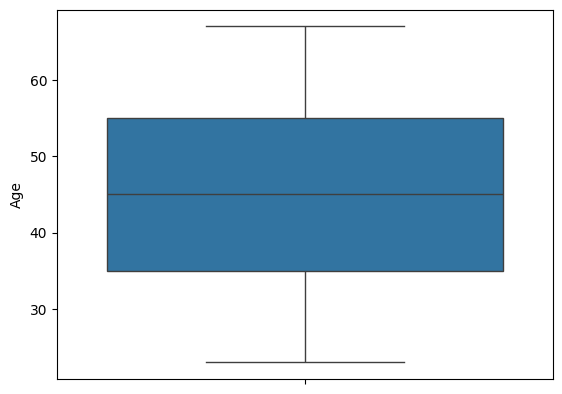

In [11]:
sns.boxplot(df['Age'])

<Axes: ylabel='Experience'>

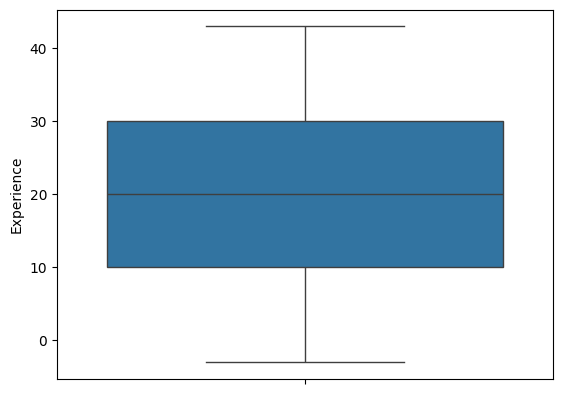

In [12]:
sns.boxplot(df['Experience'])

<Axes: ylabel='Income'>

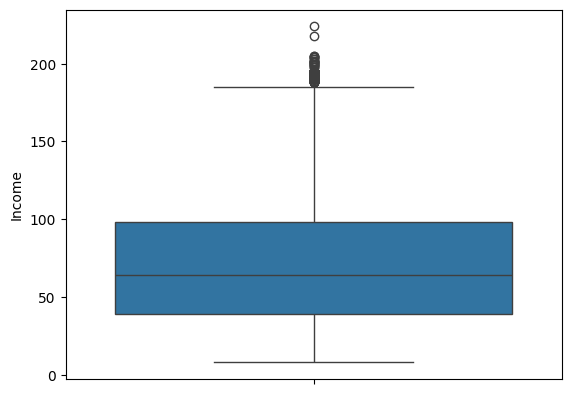

In [13]:
sns.boxplot(df['Income'])

<Axes: ylabel='CCAvg'>

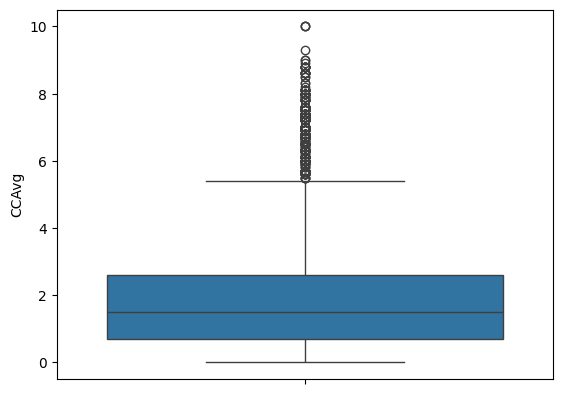

In [14]:
sns.boxplot(df['CCAvg'])

<Axes: ylabel='Mortgage'>

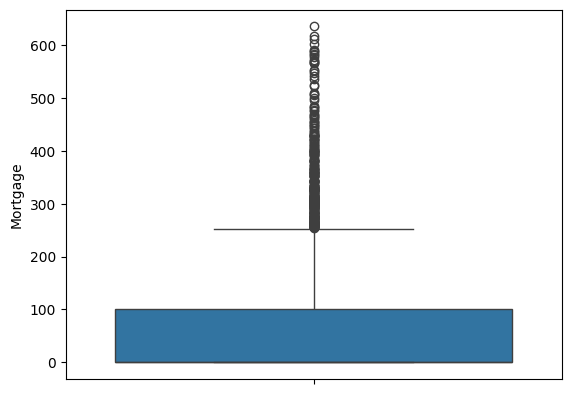

In [15]:
sns.boxplot(df['Mortgage'])

In [16]:
col=['Income','CCAvg','Mortgage']
for col in col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1
    lowwer_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR

    df[col]=np.where(((pd.Series(df[col]))>=upper_fence) | ((pd.Series(df[col]))<=lowwer_fence), df[col].median(),df[col])

In [17]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,0,1


In [18]:
x=df.drop('Personal.Loan',axis=1)
y=df['Personal.Loan']
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0.0,0,0,1,0
4996,30,4,15.0,4,0.4,1,85.0,0,0,1,0
4997,63,39,24.0,2,0.3,3,0.0,0,0,0,0
4998,65,40,49.0,3,0.5,2,0.0,0,0,1,0


In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal.Loan, Length: 4987, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape


((3490, 11), (1497, 11))

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
#Evaluation Metruces Logistic Regression 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9565798263193053

In [24]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=log_reg.predict_proba(x_test)[:,1]
y_pred_proba

array([6.90967006e-03, 9.13507641e-04, 6.91732822e-03, ...,
       4.41183659e-02, 2.18332724e-04, 4.12748362e-01])

In [25]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.42390497e-04,
       7.42390497e-04, 1.48478099e-03, 1.48478099e-03, 2.96956199e-03,
       2.96956199e-03, 3.71195249e-03, 3.71195249e-03, 4.45434298e-03,
       4.45434298e-03, 5.19673348e-03, 5.19673348e-03, 5.93912398e-03,
       5.93912398e-03, 6.68151448e-03, 6.68151448e-03, 8.16629547e-03,
       8.16629547e-03, 8.90868597e-03, 8.90868597e-03, 9.65107647e-03,
       9.65107647e-03, 1.11358575e-02, 1.11358575e-02, 1.33630290e-02,
       1.33630290e-02, 1.63325909e-02, 1.63325909e-02, 1.93021529e-02,
       1.93021529e-02, 2.00445434e-02, 2.00445434e-02, 2.22717149e-02,
       2.22717149e-02, 2.37564959e-02, 2.37564959e-02, 2.44988864e-02,
       2.44988864e-02, 2.52412769e-02, 2.52412769e-02, 2.59836674e-02,
       2.59836674e-02, 2.67260579e-02, 2.67260579e-02, 2.96956199e-02,
       2.96956199e-02, 3.04380104e-02, 3.04380104e-02, 3.19227914e-02,
       3.19227914e-02, 3.56347439e-02, 3.56347439e-02, 3.63771344e-02,
      

In [26]:
tpr

array([0.        , 0.00666667, 0.34666667, 0.34666667, 0.38      ,
       0.38      , 0.46666667, 0.46666667, 0.5       , 0.5       ,
       0.50666667, 0.50666667, 0.53333333, 0.53333333, 0.54666667,
       0.54666667, 0.55333333, 0.55333333, 0.56666667, 0.56666667,
       0.59333333, 0.59333333, 0.64666667, 0.64666667, 0.66      ,
       0.66      , 0.66666667, 0.66666667, 0.68666667, 0.68666667,
       0.69333333, 0.69333333, 0.7       , 0.7       , 0.71333333,
       0.71333333, 0.73333333, 0.73333333, 0.74      , 0.74      ,
       0.74666667, 0.74666667, 0.75333333, 0.75333333, 0.76      ,
       0.76      , 0.76666667, 0.76666667, 0.78666667, 0.78666667,
       0.79333333, 0.79333333, 0.80666667, 0.80666667, 0.81333333,
       0.81333333, 0.82      , 0.82      , 0.82666667, 0.82666667,
       0.83333333, 0.83333333, 0.84      , 0.84      , 0.84666667,
       0.84666667, 0.85333333, 0.85333333, 0.86      , 0.86      ,
       0.86666667, 0.86666667, 0.87333333, 0.87333333, 0.88   

In [27]:
thresholds

array([           inf, 9.98425413e-01, 8.62687735e-01, 8.46737933e-01,
       7.95847505e-01, 7.81764353e-01, 7.06509711e-01, 7.05378337e-01,
       6.66960313e-01, 6.60163364e-01, 6.60064607e-01, 6.59021429e-01,
       6.34597135e-01, 6.30978272e-01, 6.18079563e-01, 6.15025031e-01,
       5.95879506e-01, 5.81503134e-01, 5.73127248e-01, 5.61543329e-01,
       5.55640432e-01, 5.55496627e-01, 5.09273751e-01, 5.07742480e-01,
       4.94844274e-01, 4.82989177e-01, 4.78137524e-01, 4.68524093e-01,
       4.53299251e-01, 4.46534063e-01, 4.41992240e-01, 4.13687985e-01,
       4.12748362e-01, 4.11392059e-01, 4.01984942e-01, 3.94022306e-01,
       3.77678142e-01, 3.74947400e-01, 3.69304825e-01, 3.68676138e-01,
       3.66161744e-01, 3.65228829e-01, 3.54962888e-01, 3.54720873e-01,
       3.38129513e-01, 3.34423351e-01, 3.30081364e-01, 3.05769543e-01,
       2.98216455e-01, 2.96692964e-01, 2.95077830e-01, 2.92915074e-01,
       2.90281796e-01, 2.80512875e-01, 2.79792026e-01, 2.79089062e-01,
      

In [28]:
#Calculate auc score 
roc_auc=auc(fpr,tpr)
roc_auc

0.9586241029448156

In [29]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'penalty':['l1','l2','elasticnet'],'C':[1,2,10,20,30,40]}

grid_seach=GridSearchCV(log_reg,param_grid=param_grid,cv=5,verbose=3)
grid_seach.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.953 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.951 total time=   0.0s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.956 total time=   0.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.948 total time=   0.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.948 total time=   0.0s
[CV 1/5] END .............C=1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .............C=1, penalty=elasticne

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 10, 20, 30, 40],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=3)

In [30]:
grid_seach.best_params_

{'C': 2, 'penalty': 'l2'}

In [31]:
best_model=grid_seach.best_estimator_
best_model

LogisticRegression(C=2)

In [32]:
y_pred_tuned=best_model.predict(x_test)
y_pred_tuned

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred_tuned)

0.9565798263193053

In [34]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34.0,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0.0,0,0,0,1,0
4996,30,4,15.0,4,0.4,1,85.0,0,0,0,1,0
4997,63,39,24.0,2,0.3,3,0.0,0,0,0,0,0
4998,65,40,49.0,3,0.5,2,0.0,0,0,0,1,0
